In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read in the CDC data into a dataframe.
births = pd.read_csv('births.csv')

In [5]:
#View a snap-shot of the dataset.
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [6]:
#Use the year colummn to create a decade column.
births['decade'] = 10 * (births['year'] // 10)

In [7]:
#Display table containing female and male deaths for each decade.
births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


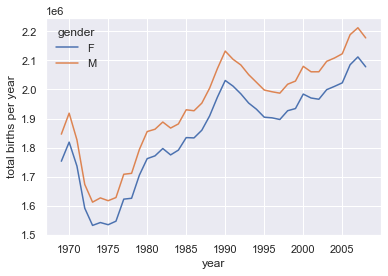

In [8]:
#Plot births.
sns.set()
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.ylabel('total births per year');

In [9]:
#Remove outliers.
quartiles = np.percentile(births['births'], [25, 50, 75])

In [10]:
mu = quartiles[1]

In [11]:
sig = 0.74 * (quartiles[2] - quartiles[0])

In [12]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [13]:
births['day'] = births['day'].astype(int)

In [14]:
births.index = pd.to_datetime(10000 * births.year +
                             100 * births.month +
                             births.day, format = '%Y%m%d')

In [15]:
births['dayofweek'] = births.index.dayofweek

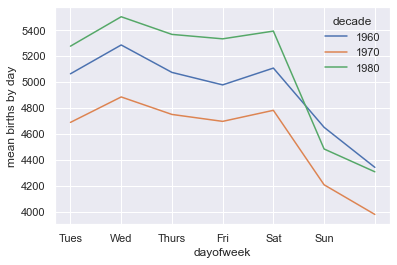

In [16]:
#Plot data.
births.pivot_table('births', index = 'dayofweek',
                  columns = 'decade', aggfunc = 'mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [17]:
#Plot the mean number of births by the day of the year.

In [18]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

In [19]:
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]

In [20]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


<AxesSubplot:>

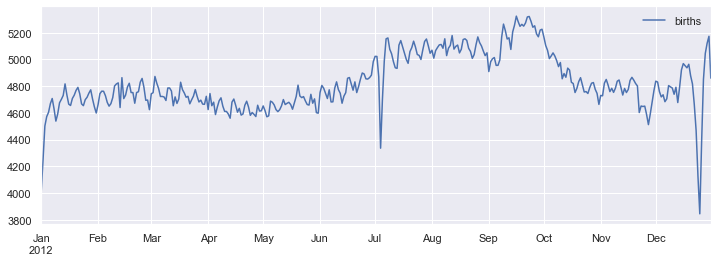

In [21]:
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax)

In [22]:
##Recreate the Average Daily Birth Rate Table.

In [23]:
quartiles = np.percentile(births['births'], [25, 50, 75])

In [24]:
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

In [25]:
births = births.query('(births > @mu - 5 *@sig) & (births < @mu + 5 * @sig)')

In [26]:
births['day'] = births['day'].astype(int)

In [27]:
births.index = pd.to_datetime(10000 * births.year +
                             100 * births.month + 
                             births.day, format = '%Y%m%d')

In [28]:
births_by_date = births.pivot_table('births',
                                   [births.index.month, births.index.day])

In [29]:
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]

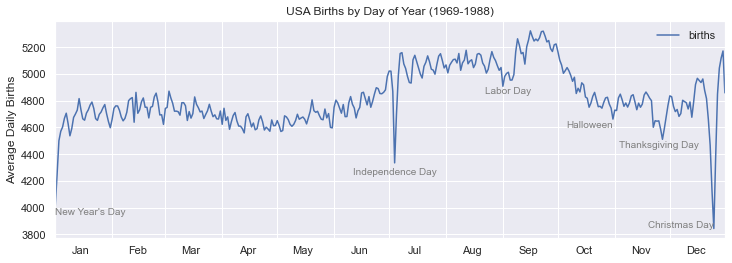

In [31]:
#Display the chart.
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax);

#Add text
style = dict(size = 10, color = 'gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha = 'center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha = 'center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha = 'right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving Day", ha = 'center', **style)
ax.text('2012-12-25', 3850, "Christmas Day", ha = 'right', **style)

ax.set(title = 'USA Births by Day of Year (1969-1988)',
      ylabel = 'Average Daily Births')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday = 15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

In [ ]:
##Adding Arrows & Annotations

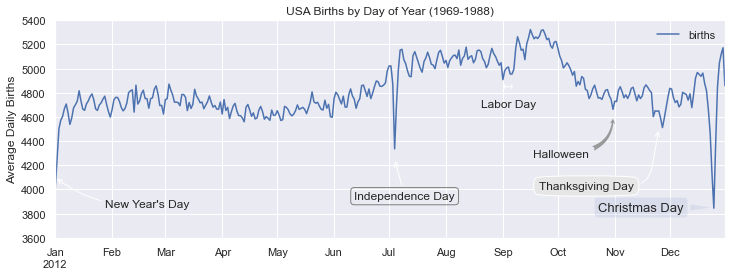

In [51]:
#Display birthrate chart.
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax)


#Add annotations and arrows:
ax.annotate("New Year's Day", xy = ('2012-1-1', 4100), xycoords = 'data',
           xytext = (50, -30), textcoords = 'offset points',
           arrowprops = dict(arrowstyle = "->",
                            connectionstyle = "arc3, rad = -0.2"))
ax.annotate("Independence Day", xy = ('2012-7-4', 4250), xycoords = 'data',
            bbox = dict(boxstyle = "round", fc = "none", ec = "gray"),
           xytext = (10, -40), textcoords = 'offset points', ha = 'center',
           arrowprops = dict(arrowstyle = "->"))
ax.annotate("Labor Day", xy = ('2012-9-4', 4850), xycoords = 'data', ha = 'center',
           xytext = (0, -20), textcoords = 'offset points')
ax.annotate('', xy = ('2012-9-1', 4850), xytext = ('2012-9-7', 4850), 
            xycoords = 'data', textcoords = 'data',
           arrowprops = {'arrowstyle': '|-|, widthA = 0.2, widthB = 0.2', })
ax.annotate("Halloween", xy = ('2012-10-31', 4600), xycoords = 'data',
           xytext = (-80, -40), textcoords = 'offset points',
           arrowprops = dict(arrowstyle = "fancy",
                             fc = "0.6", ec = "none",
                            connectionstyle = "angle3, angleA = 0, angleB = -90"))
ax.annotate("Thanksgiving Day", xy = ('2012-11-25', 4500), xycoords = 'data',
            xytext = (-120, -60), textcoords = 'offset points',
            bbox = dict(boxstyle = "round4, pad = .5", fc = "0.9"),
            arrowprops = dict(arrowstyle = "->",
                              connectionstyle = "angle, angleA = 0, angleB = 80, rad = 20"))
ax.annotate("Christmas Day", xy = ('2012-12-25', 3850), xycoords = 'data',
            xytext = (-30, 0), textcoords = 'offset points',
            size = 13, ha = 'right', va = "center",
            bbox = dict(boxstyle = "round", alpha = 0.1),
            arrowprops = dict(arrowstyle = "wedge, tail_width = 0.5",alpha = 0.1));

#Label Axes
ax.set(title = 'USA Births by Day of Year (1969-1988)',
      ylabel = 'Average Daily Births')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday = 15))
#ax.xaxis.set_major_formatter(mpl.NullFormatter())
#ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);